In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41837 entries, 56426 to 62305
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    41837 non-null  int64  
 1   parcelid                      41837 non-null  int64  
 2   bathroomcnt                   41837 non-null  float64
 3   bedroomcnt                    41837 non-null  float64
 4   calculatedfinishedsquarefeet  41837 non-null  float64
 5   fips                          41837 non-null  float64
 6   latitude                      41837 non-null  float64
 7   longitude                     41837 non-null  float64
 8   lotsizesquarefeet             41837 non-null  float64
 9   rawcensustractandblock        41837 non-null  float64
 10  regionidcity                  41837 non-null  float64
 11  regionidcounty                41837 non-null  float64
 12  regionidzip                   41837 non-null  float64
 1

(None, None, None)

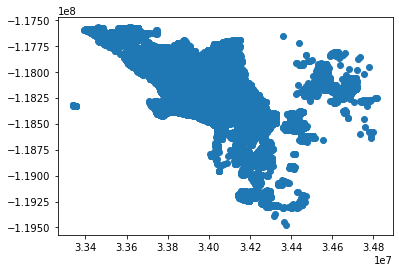

In [5]:
plt.scatter(train.latitude, train.longitude)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

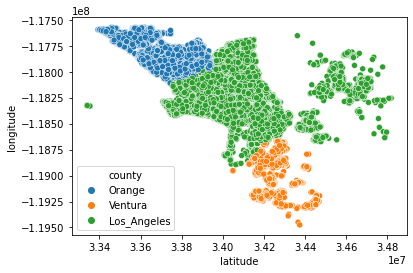

In [6]:
sns.scatterplot(x='latitude', y='longitude', data = train, hue = 'county')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

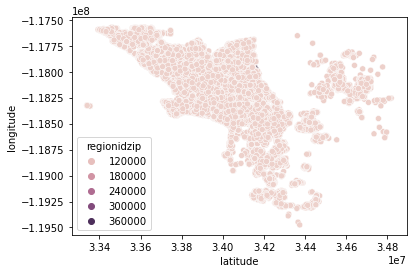

In [7]:
sns.scatterplot(x='latitude', y='longitude', data = train, hue = 'regionidzip')

#### EDA Guidance:
1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

1. Answer those questions through a mix of statistical tests and visualizations.

### 1. How does the logerror look among the different counties?

<AxesSubplot:xlabel='county', ylabel='logerror'>

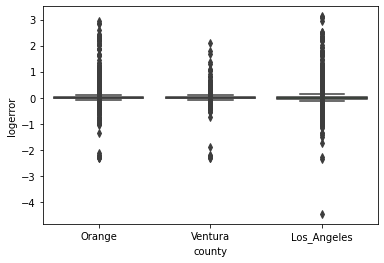

In [8]:
sns.boxplot(x='county', y='logerror', data = train)

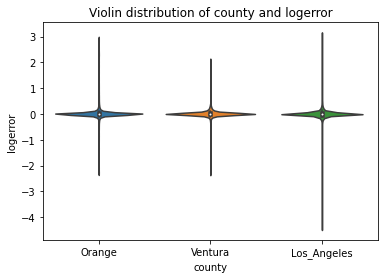

In [9]:
sns.violinplot(data=train, y='logerror', x='county')
plt.title('Violin distribution of county and logerror')
plt.show()

### What is the mean logerror for the entire dataset?

In [10]:
mean_log = train.logerror.mean()

In [11]:
mean_log

0.01627855140508533

### What is the mean logerror for each county?

In [12]:
mean_log_la = train[train.county == 'Los_Angeles'].logerror.mean()
mean_log_orange = train[train.county == 'Orange'].logerror.mean()
mean_log_ventura = train[train.county == 'Ventura'].logerror.mean()

In [13]:
mean_log_la, mean_log_orange, mean_log_ventura

(0.014207883251040393, 0.0214604890844305, 0.01444552361419602)

### Takeaway
* The mean logerror of Orange County is higher than Ventura County, which is slightly higher than Los Angeles County.

(array([1.0000e+00, 0.0000e+00, 1.8000e+01, 6.0000e+00, 7.5000e+01,
        3.7499e+04, 4.0570e+03, 1.0600e+02, 5.6000e+01, 1.9000e+01]),
 array([-4.453964  , -3.69620421, -2.93844442, -2.18068463, -1.42292484,
        -0.66516504,  0.09259475,  0.85035454,  1.60811433,  2.36587412,
         3.12363391]),
 <BarContainer object of 10 artists>)

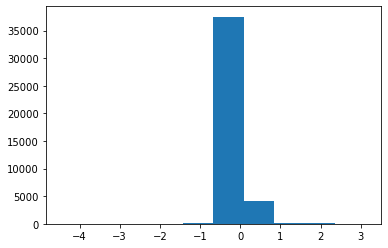

In [14]:
plt.hist(train['logerror'])